In [53]:
import pandas as pd
import numpy as np
import seaborn as sns

In [54]:
from evolutionary_forest.forest import EvolutionaryForestClassifier, EvolutionaryForestRegressor

In [55]:
train_df = pd.read_csv('/home/howt51/work/vscode_micromamba/kaggle/data/icr-identify-age-related-conditions/train.csv')
test_df = pd.read_csv('/home/howt51/work/vscode_micromamba/kaggle/data/icr-identify-age-related-conditions/test.csv')

In [56]:
test_df

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
train_df.columns

Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

In [58]:
# train_df.dtypes

<Axes: xlabel='Class', ylabel='count'>

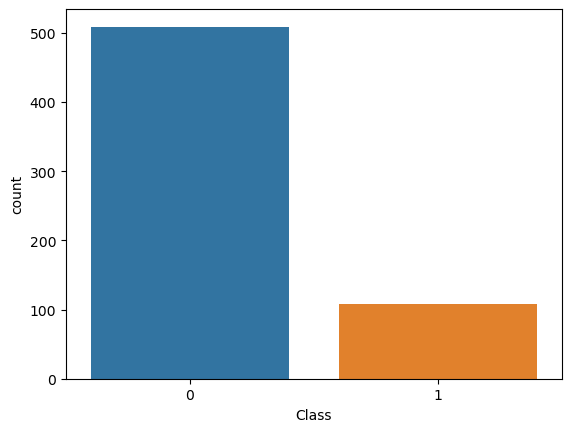

In [59]:
sns.countplot(x='Class', data=train_df)

<Axes: xlabel='EJ', ylabel='count'>

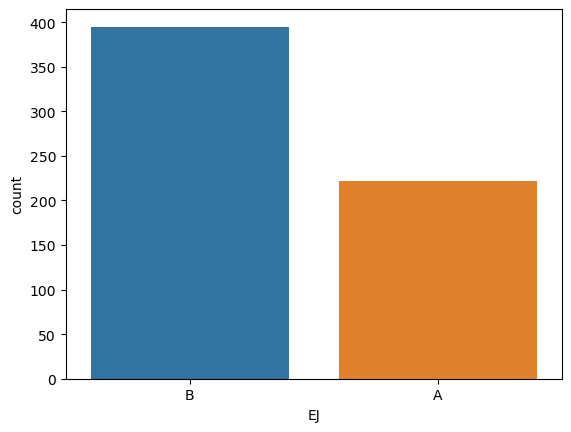

In [60]:
sns.countplot(x='EJ', data=train_df)


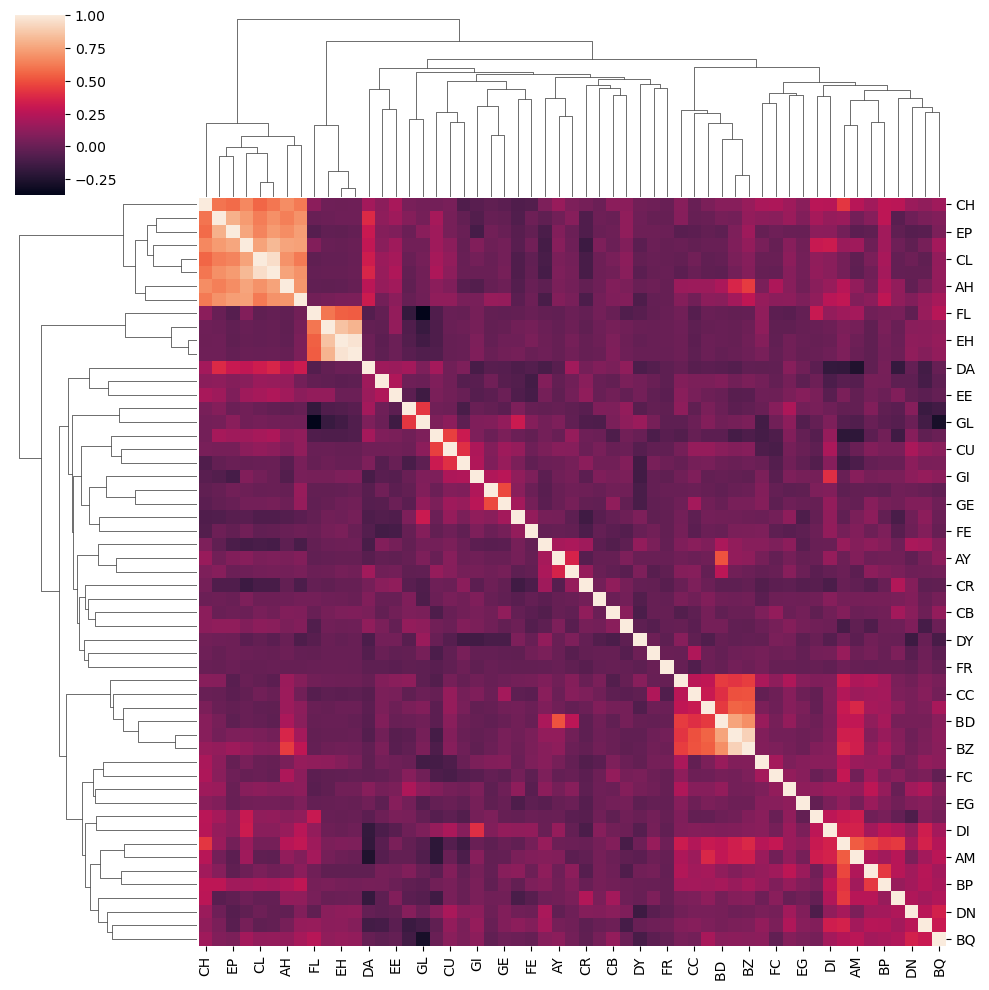

In [61]:
sns.clustermap(train_df.drop(['Id','Class','EJ'], axis=1).corr())

In [62]:
id_features = ['Id']

data = train_df.drop(id_features, axis=1)
y = data.pop('Class')
X = data.drop('EJ', axis=1)

In [63]:
X.columns

Index(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN', 'BP',
       'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU',
       'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB',
       'EE', 'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL', 'FR',
       'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL'],
      dtype='object')

In [64]:
r = EvolutionaryForestRegressor(max_height=5, normalize=True, select='AutomaticLexicase',
                                gene_num=10, boost_size=100, n_gen=20, n_pop=200, cross_pb=1,
                                base_learner='Random-DT', verbose=True, n_process=1)
r.fit(X, y)

data shape (617, 55) (617,)
   	      	                                                          fitness                                                           	                                  size                                  
   	      	----------------------------------------------------------------------------------------------------------------------------	------------------------------------------------------------------------
gen	nevals	25%          	75%          	avg         	gen	max          	median       	min          	nevals	std         	25%	75%	avg  	gen	max	median	min	nevals	std     
0  	200   	[-0.67236047]	[-0.41421087]	[-0.5508618]	0  	[-0.16728516]	[-0.54889762]	[-1.08764462]	200   	[0.17002419]	3  	4  	3.665	0  	5  	4     	3  	200   	0.642476
defaultdict(<class 'int'>, {'1': 200})
P value of different population 0.5395103167994048
Add(DU, DU)
Add(Add(FC, DV), Sub(CH, BP))
Sub(CF, EE)
Add(DH, CC)
Add(AQ(AZ, FE), Mul(AB, DY))
AQ(CD , FC)
Add(EB, Sub(Add(1, FS),

EvolutionaryForestRegressor(basic_primitives='Add,Sub,Mul,AQ', boost_size=100,
                            cross_pb=1, gene_num=10, mab_parameter={},
                            map_elite_parameter={}, max_height=5, n_pop=200,
                            select='AutomaticLexicase', verbose=True)

In [68]:
_dict = get_feature_importance(r, simple_version=False, latex_version=False)


TypeError: unhashable type: 'slice'

In [84]:
simplified_dict = {}
for key,val in _dict.items():
    simplified_dict[key.split(": ")[1][:]]= val

In [85]:
simplified_dict

{'Add(AR, DU)': 0.02175384600800931,
 'AQ(CR, Sub(CS, CF))': 0.017237007917367788,
 'Sub(AM, FL)': 0.01674568661867597,
 'Mul(DU, Sub(-1, EL))': 0.013123142988346815,
 'Sub(-1, DU)': 0.013020685571668205,
 'Sub(FD , Mul(0, BC))': 0.012844447901500968,
 'Add(DA, Mul(FL, AX))': 0.012212571758245163,
 'Add(AQ(BQ, EL), CL)': 0.011479850920566692,
 'AQ(FE, CW )': 0.01096620625091718,
 'AQ(EH, CS)': 0.010673883392463217,
 'Sub(AQ(FD , GB), Sub(DH, DH))': 0.01054230743735683,
 'Sub(DF, DE)': 0.01038796998420538,
 'Sub(AF, BC)': 0.010375649784895722,
 'AQ(Sub(DN, BC), Mul(GF, DA))': 0.010129283170291731,
 'AQ(BZ, BR)': 0.009396858924934052,
 'Add(GL, GL)': 0.009061173871763643,
 'AQ(DH, CH)': 0.008364282176929624,
 'Add(Add(EP, EU), DN)': 0.007989021672635176,
 'AQ(DF, FL)': 0.007909629760199705,
 'Sub(AB, CB)': 0.007812858510348806,
 'AQ(Add(AM, CD ), BR)': 0.007802701791436775,
 'Sub(FE, CW )': 0.007309624798496056,
 'AQ(DU, GE)': 0.0068409452551573,
 'Mul(Mul(EL, AF), Mul(AX, BC))': 0.00674

In [87]:
# get_feature_importance(r)

In [66]:
from evolutionary_forest.utils import get_feature_importance, plot_feature_importance

code_importance_dict = get_feature_importance(r)
plot_feature_importance(code_importance_dict)

TypeError: unsupported operand type(s) for +: 'Symbol' and 'ComplexField'

In [ ]:
"((Integer (0 )+Symbol ('DA' ))+(Symbol ('FL' )+GF ))"
TypeError: unsupported operand type(s) for +: 'Symbol' and 'type'


ValueError: Error from parse_expr with transformed code: "(Symbol ('DH' )+CC )"
TypeError: unsupported operand type(s) for +: 'Symbol' and 'ComplexField'

In [38]:
# help(EvolutionaryForestClassifier)

In [25]:
r = EvolutionaryForestClassifier(max_height=5, normalize=True, select='AutomaticLexicase',
                                gene_num=10, boost_size=100, n_gen=20, n_pop=200, cross_pb=1,
                                base_learner='Random-DT', verbose=True, n_process=1)
r.fit(X, y)
# print(r2_score(y_test, r.predict(x_test

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


data shape (617, 55) (617,)


TypeError: object of type 'int' has no len()